In [7]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def get_auc_mae(csv_saving_path):
    this_csv_to_plot = pd.read_csv(csv_saving_path)
    #print(this_csv_to_plot.keys)
    mae_list = [this_csv_to_plot['mae'][0]]
    auc_list = [this_csv_to_plot['auc'][0]]
    count = 1
    while count < 10:
        this_mae_name = 'mae.'+str(count)
        this_auc_name = 'auc.'+str(count)
        mae_list.append(this_csv_to_plot[this_mae_name][0])
        auc_list.append(this_csv_to_plot[this_auc_name][0])
        count+=1

    return(np.mean(auc_list),np.mean(mae_list))  

In [24]:
def get_mean_svd(csv_saving_path,csv_result_path):
    this_csv_to_plot = pd.read_csv(csv_saving_path)
    this_csv_to_plot.keys
    mae_list = [this_csv_to_plot['mae'][0]]
    auc_list = [this_csv_to_plot['auc'][0]]
    bias_list = [this_csv_to_plot['bias'][0]]
    tss_list = [this_csv_to_plot['tss'][0]]
    threshold_list = [this_csv_to_plot['tss_threshold'][0]]
    count = 1
    while count < 10:
        this_mae_name = 'mae.'+str(count)
        this_auc_name = 'auc.'+str(count)
        this_bias_name = 'bias.'+str(count)
        this_tss_name = 'tss.'+str(count)
        this_threshold_name = 'tss_threshold.'+str(count)
        mae_list.append(this_csv_to_plot[this_mae_name][0])
        auc_list.append(this_csv_to_plot[this_auc_name][0])
        bias_list.append(this_csv_to_plot[this_bias_name][0])
        tss_list.append(this_csv_to_plot[this_tss_name][0])
        threshold_list.append(this_csv_to_plot[this_threshold_name][0])
        count+=1

    this_df = pd.DataFrame({'auc_mean': [np.mean(auc_list)], 'auc_std': [np.std(auc_list)],
                            'mae_mean': [np.mean(mae_list)], 'mae_std': [np.std(mae_list)],
                            'bias_mean': [np.mean(bias_list)], 'bias_std': [np.std(bias_list)],
                            'tss_mean': [np.mean(tss_list)], 'tss_std': [np.std(tss_list)],
                            'tss_threshold_mean': [np.mean(threshold_list)], 'tss_threshold_std': [np.std(threshold_list)],})
    this_df.to_csv(csv_result_path)

In [45]:
#auc,mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_process/San/evaluate/cv_metric_results.csv")
get_mean_svd(csv_saving_path="/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_buffer/San/evaluate/cv_metric_results.csv",
             csv_result_path="/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_buffer/San/evaluate/cv_metric_mean_std_results.csv")

In [23]:
pca_grid_auc,pca_grid_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_process/San/evaluate/cv_metric_results.csv")


<bound method NDFrame.keys of    Unnamed: 0      mae       tss      bias       auc  tss_threshold     mae.1  \
0           1  0.07802  0.836333 -0.034998  0.964117       0.209544  0.072467   

      tss.1    bias.1     auc.1  ...     mae.8     tss.8   bias.8     auc.8  \
0  0.895871 -0.032616  0.970532  ...  0.065683  0.906333 -0.03012  0.977433   

   tss_threshold.8     mae.9     tss.9    bias.9     auc.9  tss_threshold.9  
0         0.219833  0.075266  0.883607 -0.039992  0.974672          0.18036  

[1 rows x 51 columns]>


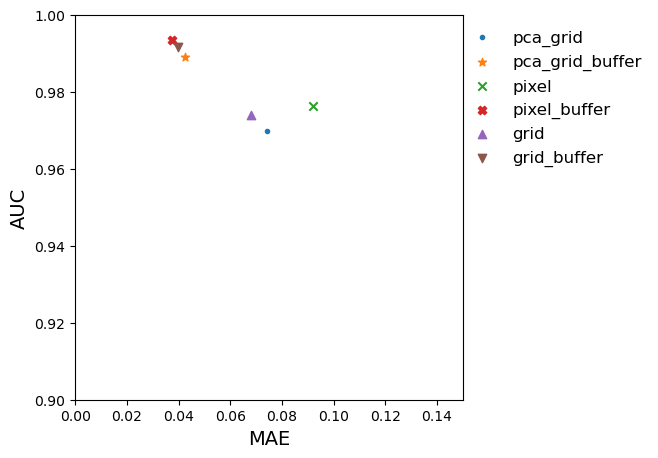

In [58]:
plt.figure(figsize=(5,5))
pca_grid_auc,pca_grid_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_process/San/evaluate/cv_metric_results.csv")
plt.scatter(pca_grid_mae, pca_grid_auc,label="pca_grid",marker='.')
pca_grid_buffer_auc,pca_grid_buffer_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_buffer_process/San/evaluate/cv_metric_results.csv")
plt.scatter(pca_grid_buffer_mae, pca_grid_buffer_auc,label="pca_grid_buffer",marker="*")
pixel_auc,pixel_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold/San/evaluate/cv_metric_results.csv")
plt.scatter(pixel_mae,pixel_auc,label="pixel",marker='x')
pixel_buffer_auc,pixel_buffer_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_buffer/San/evaluate/cv_metric_results.csv")
plt.scatter(pixel_buffer_mae,pixel_buffer_auc,label="pixel_buffer",marker="X")
grid_auc,grid_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid/San/evaluate/cv_metric_results.csv")
plt.scatter(grid_mae,grid_auc,label="grid",marker="^")
grid_buffer_auc,grid_buffer_mae = get_auc_mae("/Users/vivianhuang/Desktop/R-modeling-scripts/r_chagasM/output/kfold_grid_buffer/San/evaluate/cv_metric_results.csv")
plt.scatter(grid_buffer_mae,grid_buffer_auc,label="grid_buffer",marker="v")
plt.xlim([0,0.15])
plt.ylim([0.9,1])
plt.xlabel("MAE",fontsize=14)
plt.ylabel("AUC",fontsize=14)
plt.legend(bbox_to_anchor=(1.5, 1.00),
           frameon=False,
           fontsize=12)